In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')

[Data Science Books: Goodreads](https://www.kaggle.com/datasets/kanchana1990/data-science-books-goodreads)

In [2]:
data = pd.read_csv("../Data/goodreads_data_science_books.csv")

In [3]:
len(data)

392

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   authorName       392 non-null    object 
 1   bookFormat       386 non-null    object 
 2   bookId           392 non-null    int64  
 3   description      379 non-null    object 
 4   numberOfPages    371 non-null    float64
 5   numberOfRatings  392 non-null    int64  
 6   numberOfReviews  392 non-null    int64  
 7   publishedBy      271 non-null    object 
 8   publishedDate    392 non-null    object 
 9   rating           390 non-null    float64
 10  title            392 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 33.8+ KB


In [5]:
data = data.drop_duplicates()

In [6]:
data.shape

(193, 11)

In [7]:
data.isna().sum()

authorName          0
bookFormat          2
bookId              0
description         6
numberOfPages      11
numberOfRatings     0
numberOfReviews     0
publishedBy        61
publishedDate       0
rating              1
title               0
dtype: int64

In [8]:
numeric_data = data.select_dtypes(include='number')
numeric_data = numeric_data.drop(columns=['bookId'])

In [9]:
numeric_data.head()

,numberOfPages,numberOfRatings,numberOfReviews,rating
0,154.0,274,39,3.74
1,432.0,231,25,3.45
2,280.0,752,89,3.91
3,546.0,593,56,4.31
4,168.0,394,18,4.13


In [10]:
corr = numeric_data.corr() # корреляция признаков
corr.style.background_gradient(cmap='coolwarm')

,numberOfPages,numberOfRatings,numberOfReviews,rating
numberOfPages,1.000000,0.070579,0.048277,0.274271
numberOfRatings,0.070579,1.000000,0.944644,0.102985
numberOfReviews,0.048277,0.944644,1.000000,0.126758
rating,0.274271,0.102985,0.126758,1.000000


Тут может показаться, что **количество оценок** и **количество рецензий** слишком коррелировано и одно из стоит выкинуть для предотвращения мультиколлениарности. 

Самое интересное: связь **рейтинга** и **количества страничек**.

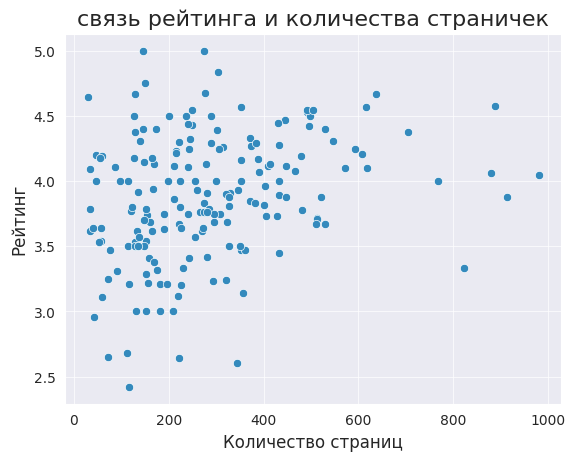

In [11]:
sns.set_style('darkgrid')
plt.title('связь рейтинга и количества страничек',size=16)
plt.ylabel('Рейтинг',size=12)
plt.xlabel('Количество страниц',size=12)
sns.scatterplot(x='numberOfPages', y='rating', data=numeric_data)
plt.show()

```
( ‾́ ◡ ‾́ )
```

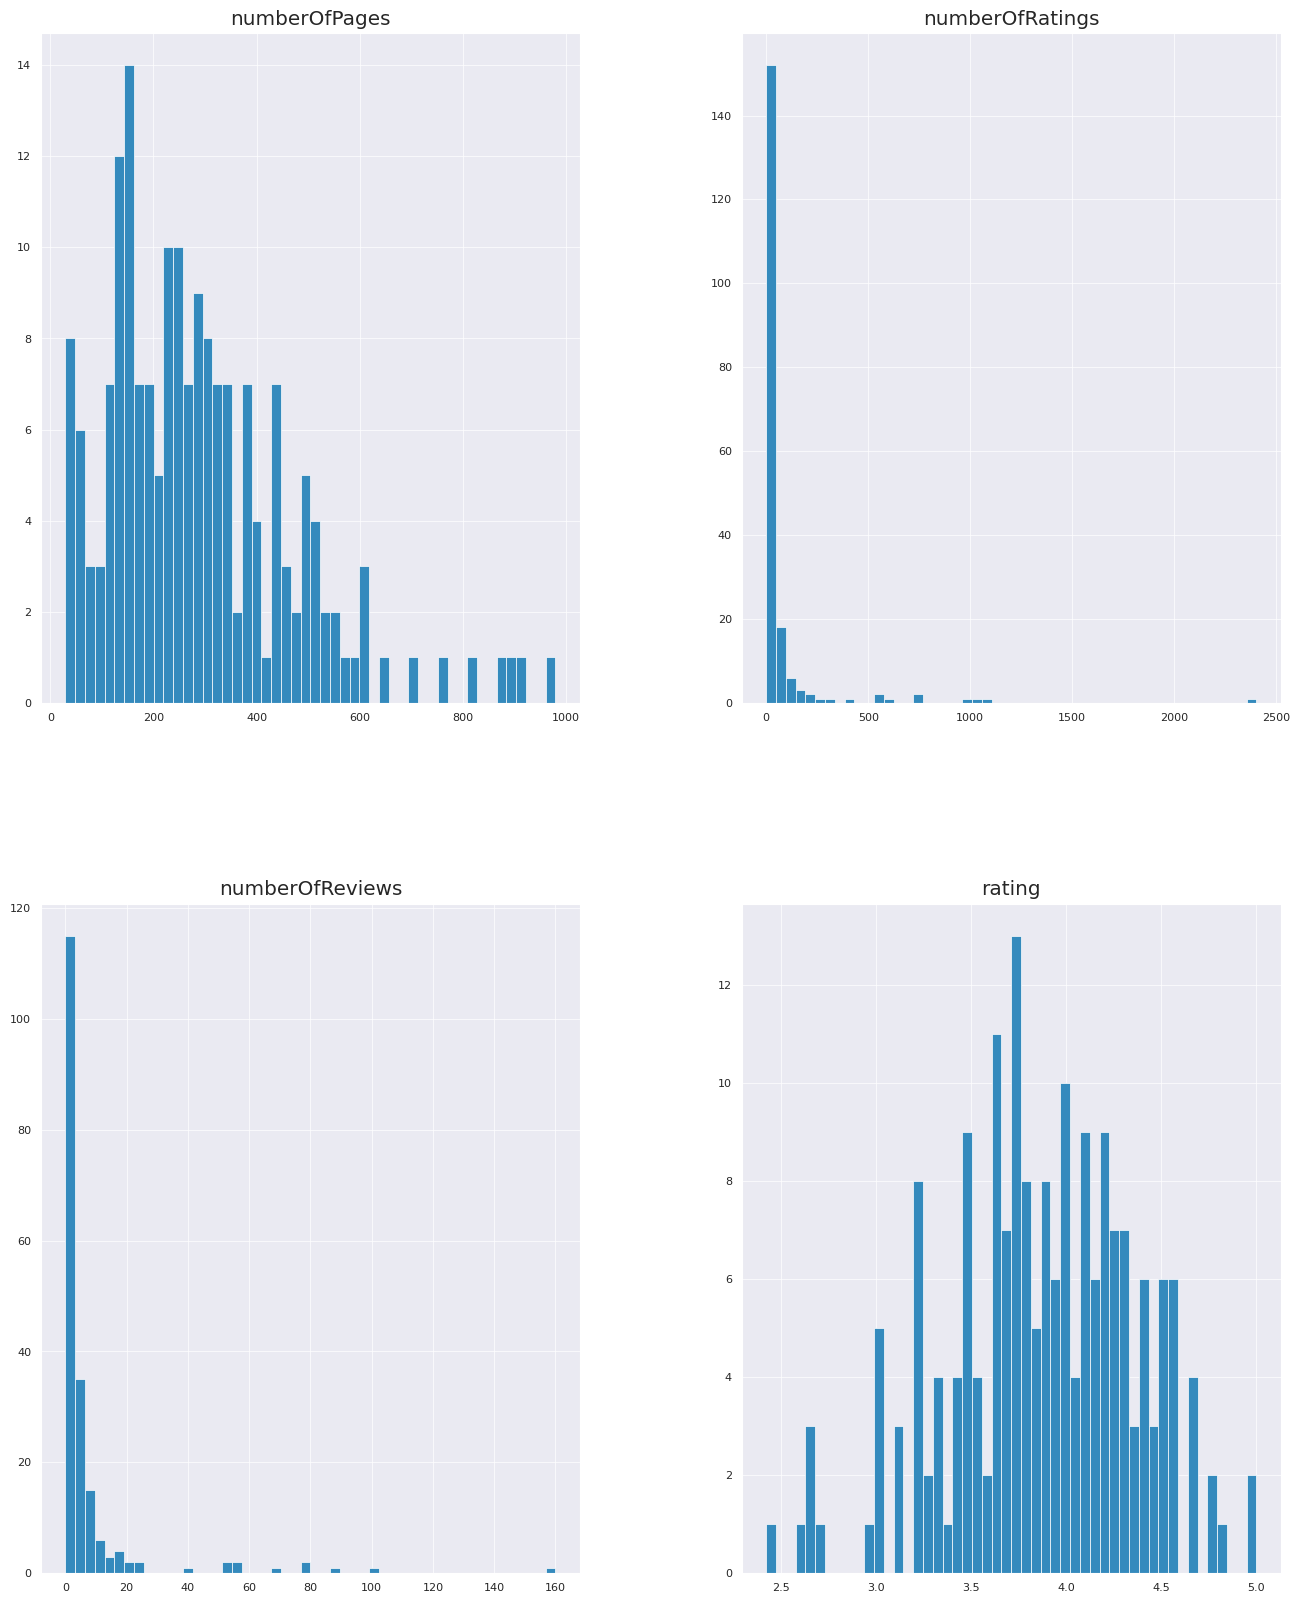

In [12]:
numeric_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

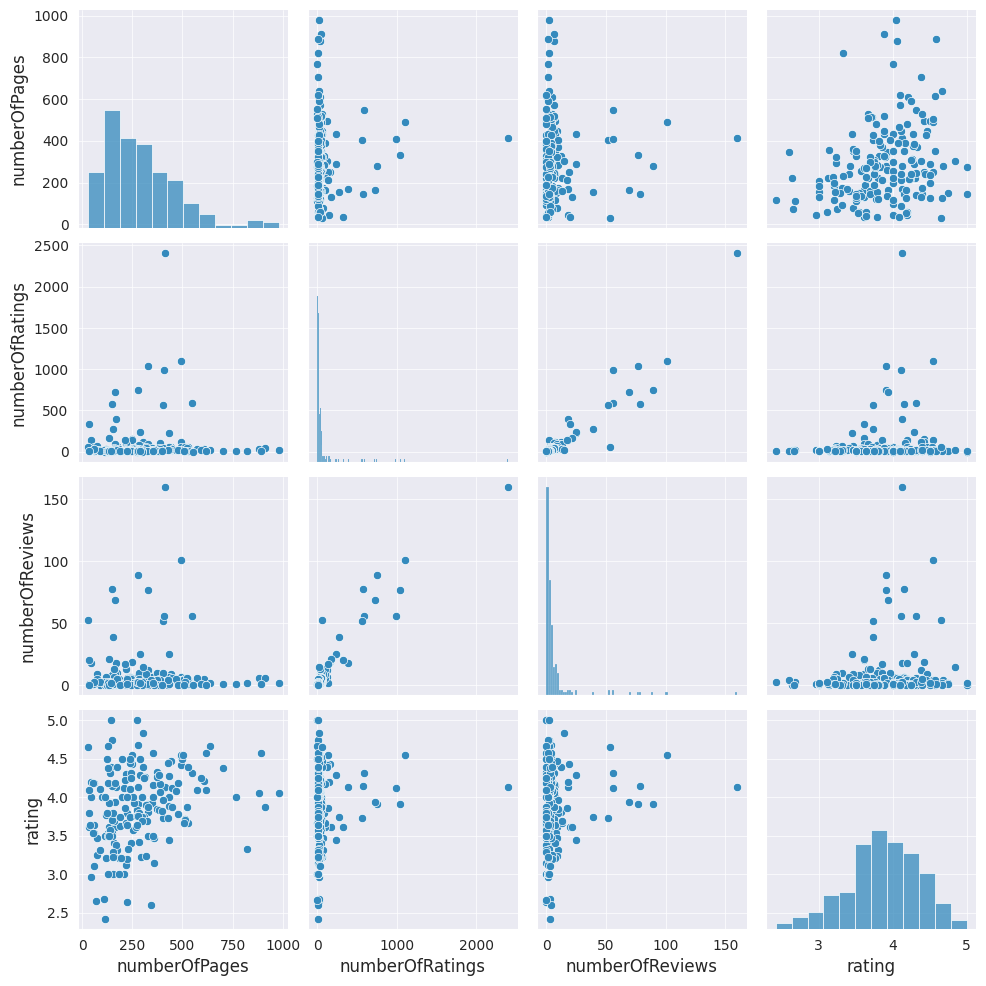

In [13]:
sns.pairplot(numeric_data)